### Generate the gravitational-wave waveform for a binary merger ###

In [1]:
# Install the software we need
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

In [2]:
import pylab
from pycbc.waveform import get_td_waveform

# The mass of the component objects solar masses
m1 = 20
m2 = 20 

# Start the waveform from 20 Hz
f_lower = 20

# The model of the gravitational-wave signal we are using
approximant = "SEOBNRv4"

# The time between samples that we want
delta_t = 1.0 / 4096

# Distance in million parsecs (1 parsec ~ 3.3 light years)
# This ignores redshift due to expansion of the universe (luminosity distance)
distance = 100 

#Generate the waveform. 
#Like electromagnetic radiation, gravitational-waves have two
#polarizations.
#We call them the "plus" polarization and a "cross" polarization
hp, hc = get_td_waveform(approximant=approximant,
                         mass1=m1, mass2=m2,
                         delta_t=delta_t, f_lower=f_lower,
                         distance=distance)
pylab.figure(1)
pylab.plot(hp.sample_times, hp, label='Plus polarization')
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()
# The plot below will show the strain for a source that is located
# directly above a detector. We will show later tutorial
# how this maps to non-optimal sky locations and real detector 
# antenna patters

<Figure size 640x480 with 1 Axes>

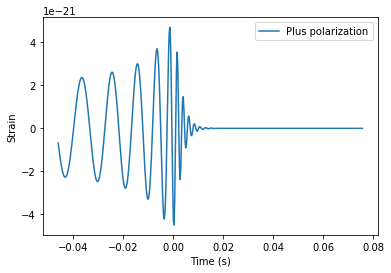

In [3]:
# Let's zoom in on the time that the binary merges
pylab.figure(2)
hp_merge = hp[len(hp)-500:]
pylab.plot(hp_merge.sample_times, hp_merge, label='Plus polarization')
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()
# You can see the signal as it evolves from the 'inspiral'
# stage to the 'merger' and finally when it 'rings down' (like a bell!)

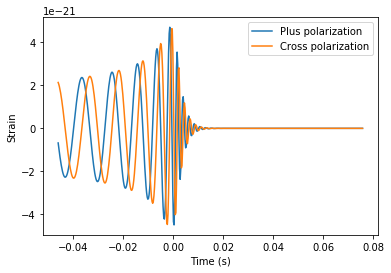

In [4]:
# Let's zoom in on the time that the binary merges
# Below we show the orthognal "cross" polarization of the gravitational
# wave also overlaid.
pylab.figure(3)
hc_merge = hc[len(hc)-500:]
pylab.plot(hp_merge.sample_times, hp_merge, label="Plus polarization")
pylab.plot(hc_merge.sample_times, hc_merge, label='Cross polarization')
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()